# COMP 551 - Mini-project 3
Group 63

In [ ]:
import keras
import numpy as np
%matplotlib inline                                 
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace  
import scipy.sparse as sparse
import pandas as pd
import seaborn as sns
import os

np.random.seed(1234)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/COMP551_mini_proj3/figures'

Mounted at /content/drive


## Task 1. Data pre-processing

- Load the raw data from Keras.
- Vectorize 28*28 pictures to 1D vector.
- Normalize the intensity of the pixel.

Load the MNIST dataset distributed with Keras. 

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Vectorize the 28*28 pictures to a 784 vector.

In [ ]:
x_train = np.reshape(x_train, (-1, 784)).astype('float32')
x_test = np.reshape(x_test, (-1, 784)).astype('float32')
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


The intensity ranges from 0 to 255. We divide all intensities by the maximum (255) to obtain a [0-1] range.

In [ ]:
print('Intensity before normalization:', np.amin(x_train), np.amax(x_train))
x_train, x_test = x_train/255.0, x_test/255.0
print('Intensity after normalization:', np.amin(x_train), np.amax(x_train))

Intensity before normalization: 0.0 1.0
Intensity after normalization: 0.0 0.003921569


Plot the class distribution.

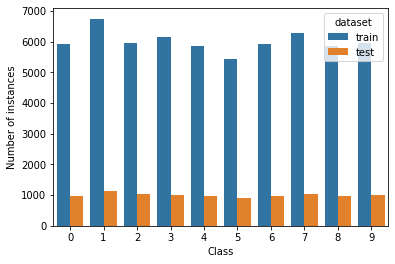

In [ ]:
y_train_df = pd.DataFrame(data=y_train, columns=['class'])
y_test_df = pd.DataFrame(data=y_test, columns=['class'])
y_train_df['dataset'] = 'train'
y_test_df['dataset'] = 'test'
y_df = pd.concat([y_train_df, y_test_df], axis=0)
ax = sns.countplot(x='class', hue ='dataset', data=y_df)
ax.set(xlabel='Class', ylabel='Number of instances')
plt.savefig(os.path.join(path,'distribution_labels.png'))
plt.show()

We transform the (N,) vector of labels using one-hot encoding into a (N,C) matrix.

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
print(y_train.shape, y_test.shape)
print(y_train[0:3,])

(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
